# Exercise 3 - Linear regression optimisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [2]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [3]:
dataset_train.head()

,x,y
0,-1.000000,-1.859783
1,0.333333,2.768337
2,1.666667,3.246021
3,3.000000,1.784168
4,4.333333,2.175140


In [4]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

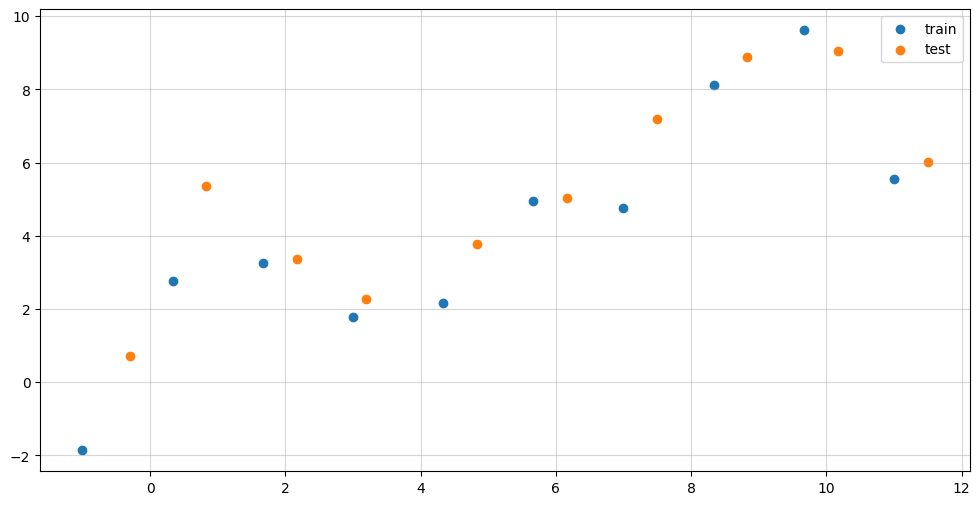

In [5]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [6]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [9]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.


def rendre_vecteur_1d(x: np.array) -> np.array:
    x = np.asarray(x, dtype=float)
    if x.ndim > 1:
        x = x.reshape(-1)
    return x

def construire_matrice_poly(X: np.array, order: int) -> np.array:
    X = rendre_vecteur_1d(X)
    N = X.shape[0]
    M = np.ones((N, order + 1))  # colonne de biais X^0
    for p in range(1, order + 1):
        M[:, p] = X ** p
    return M

def fit(X_train: np.array, y_train: np.array, order: int) -> np.array:
    X_train = rendre_vecteur_1d(X_train)
    y_train = rendre_vecteur_1d(y_train)

    # biais + puissances
    X_design = construire_matrice_poly(X_train, order)

    # thetas = (X^T X)^(-1) X^T y
    thetas = np.linalg.pinv(X_design.T @ X_design) @ (X_design.T @ y_train)

    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:

    thetas = rendre_vecteur_1d(thetas)
    X = rendre_vecteur_1d(X)

    # y = theta0*X^0 + theta1*X^1 + ... + thetaK*X^K
    y_pred = np.zeros_like(X, dtype=float)
    for power, theta in enumerate(thetas):
        y_pred += theta * (X ** power)

    return y_pred

Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 1.35; cost on test set: 1.61
Order=3; cost on train set: 1.31; cost on test set: 1.54
Order=4; cost on train set: 0.20; cost on test set: 1.03
Order=5; cost on train set: 0.20; cost on test set: 0.98
Order=6; cost on train set: 0.14; cost on test set: 2.19
Order=7; cost on train set: 0.12; cost on test set: 4.74
Order=8; cost on train set: 1.07; cost on test set: 2.13
Order=9; cost on train set: 1.11; cost on test set: 2.75
Order=10; cost on train set: 1.48; cost on test set: 27.21


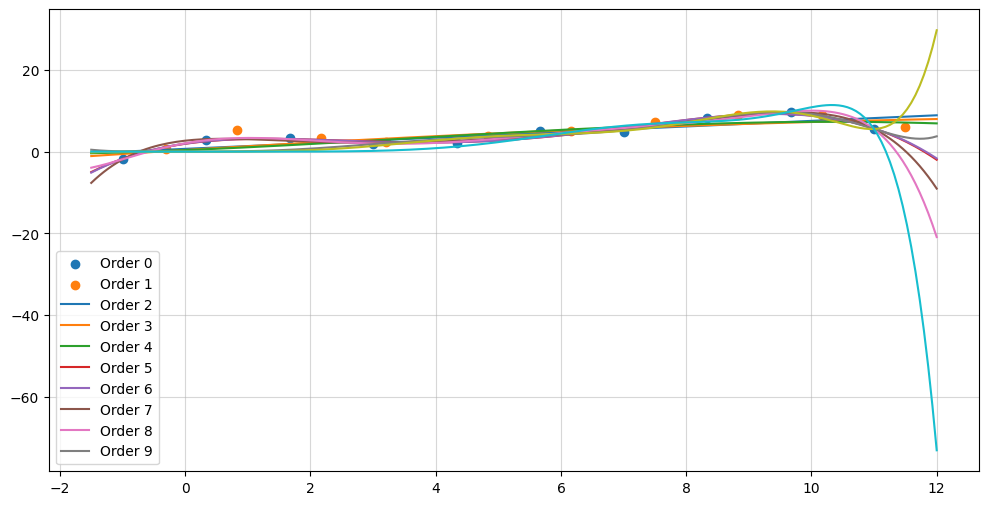

In [13]:
# Figure et nuages de points (on garde ta base)
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

# Axe x
x_unseen = np.linspace(min(X_train.min(), X_test.min()) - 0.5,
                       max(X_train.max(), X_test.max()) + 0.5,
                       200)

train_cost_curve = []
test_cost_curve = []

for order in range(1,11):
    # training 
    thetas = fit(X_train, y_train, order)

    # test sur train
    y_pred_train = predict(thetas, X_train)
    cost_train = compute_cost(y_pred_train, y_train)
    train_cost_curve.append(cost_train)

    # test sur test
    y_pred_test = predict(thetas, X_test)
    cost_test = compute_cost(y_pred_test, y_test)
    test_cost_curve.append(cost_test)

    # tracé courbre
    y_pred_line = predict(thetas, x_unseen)
    plt.plot(x_unseen, y_pred_line)  # une ligne par ordre

    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")

plt.legend([f"Order {i}" for i in range(10)]);

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

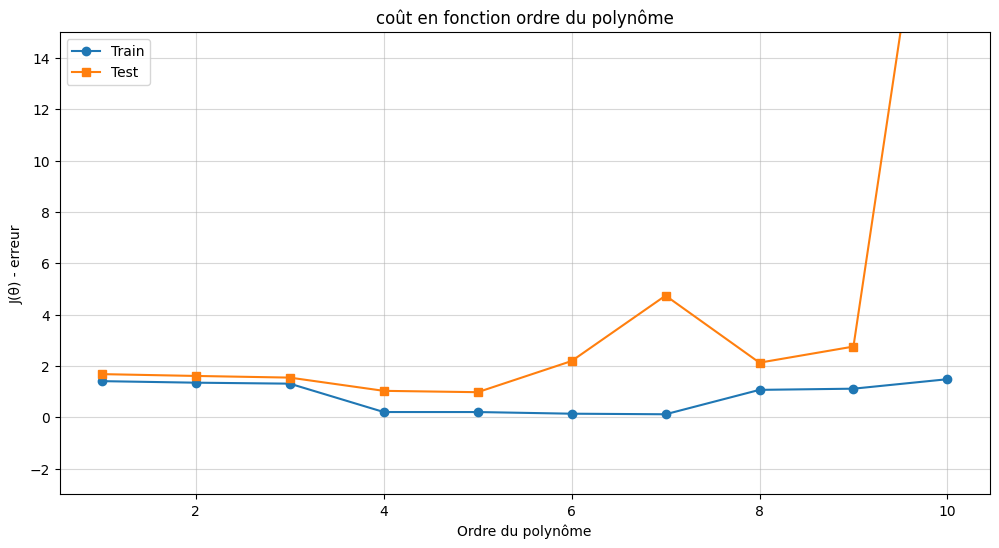

In [16]:
# step = 1
x_order = np.arange(1, 11, 1)

plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(x_order, train_cost_curve, marker='o')
plt.plot(x_order, test_cost_curve, marker='s')
plt.ylim(-3, 15)


plt.title("coût en fonction ordre du polynôme")
plt.xlabel("Ordre du polynôme")
plt.ylabel("J(θ) - erreur")

plt.legend(['Train', 'Test'])
plt.show()

**f) What is your best model according to these costs ? Comment your answer.**

TODO: answer

**g) Would you still choose the model with the lowest cost for production?**

TODO: answer

**h) Explain how under/over-fitting is involved here.**

TODO: answer